# BBM 467 Small Data Science Project

#### 21627601 Muhammet Subasi
#### 21627045 Harun Burkuk



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Table of Content

[Purpose](#purpose) 

[Data Understanding](#data_understanding) 

[Data Preparation](#data_preparation)   

[Model](#model)  

[Evaluation](#evaluation)

[Web Interface]("webinterface")

[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

There are some diseases that are hard to diagnose by physicians. For instance, the disease may be rare and the physician responsible has no experience with that disease whatsoever. In this project we will create a web interface that takes features as input from the user then our model will predict the probability of the patient's disease type and show these probabilities to the doctor or health officer responsible for diagnosing.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
df = pd.read_excel("sdsp_patients.xlsx", engine='openpyxl')
print(df.shape)

(400, 51)


As you can see from the shape of the data, dataset contains 400 samples and 51 columns.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    object 
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_16  400 non-null    object 
 17  Feature_17  400 non-null    object 
 18  Feature_18  400 non-null    object 
 19  Feature_19  400 non-null    o

Now we can see the columns of the dataset, their names and their types. Dataset contains 51 columns, one of the columns is 'Disease' which our target(label) column, other columns are our features, there are 50 feature in dataset.

Disease_1    244
Disease_3     78
Disease_2     52
Disease_4     26
Name: Disease, dtype: int64


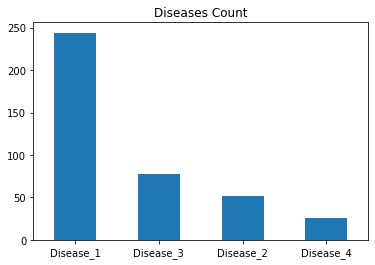

In [4]:
print(df['Disease'].value_counts())
ax = df['Disease'].value_counts().plot(kind="bar", rot=0)
ax.title.set_text('Diseases Count')

You can see the distrubution of the Diaseases type. There are 244 Disease_1, 78 Disease_3, 52 Disease_2 and finally 26 Disease_4 in the dataset.

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [5]:
# Fill or drop NaN values
df = df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace(' ', np.nan)
df = df.loc[:, df.isin(['', np.NaN, np.nan]).mean() < .09]

# replace all non-numeric feature values with numeric values
df = df.replace('Yes', 1)
df = df.replace('No', 0)
df = df.replace('Male', 1)
df = df.replace('Female', 0)
val_rep = {'Every Day': 0, '1-2 Days a Week': 1, '3-4 Days a Week': 2, '1-2 Days a Month': 3}
df['Feature_28'] = df['Feature_28'].map(val_rep)
val_rep = {'No Difference': 0, 'Evenings': 2, 'Mornings': 1}
df['Feature_29'] = df['Feature_29'].map(val_rep)
val_rep = {'Disease_1': 1, 'Disease_2': 2, 'Disease_3': 3, 'Disease_4': 4}
df['Disease'] = df['Disease'].map(val_rep)
df = df.rename(columns={'Feature_1': 'Gender'})

# fill empty values with column mean
df['Feature_28'] = df['Feature_28'].fillna(round(df['Feature_28'].mean()))
df['Feature_32'] = df['Feature_32'].fillna(round(df['Feature_32'].mean()))
df['Feature_33'] = df['Feature_33'].fillna(round(df['Feature_33'].mean()))
df['Feature_3'] = df['Feature_3'].fillna(round(df['Feature_3'].mean()))
df['Feature_47'] = df['Feature_47'].fillna(round(df['Feature_47'].mean()))
df['Feature_48'] = df['Feature_48'].fillna(round(df['Feature_48'].mean()))
df['Feature_49'] = df['Feature_49'].fillna(round(df['Feature_49'].mean()))
df['Feature_50'] = df['Feature_50'].fillna(round(df['Feature_50'].mean()))

# final form of data
df['Feature_3'] = pd.to_numeric(df['Feature_3'])
df['Feature_47'] = pd.to_numeric(df['Feature_47'])
df['Feature_48'] = pd.to_numeric(df['Feature_48'])
df['Feature_49'] = pd.to_numeric(df['Feature_49'])
df['Feature_50'] = pd.to_numeric(df['Feature_50'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    int64  
 1   Gender      400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

In data preparation part, first of all, since it is a excel based dataset null values are just empty so we have to convert that empty values to NaN values. Then in the dataset there are multiple colmuns that mostly empty so we have to drop them because filling them will not be suffeficient. Then we have to replace columns which contains string values in order to apply machine learning models. Then we can fill NaN values with mean values of the columns to make sure that there is no NaN values in our dataset. Finally we are converting column types to numerical so that all columns are numeraical. You can see the final form of the dataset above.

In [6]:
X = df.iloc[:, 1:49]  # independent columns
y = df.iloc[:, 0]  # target column - disease_number

##### Functions for feature selection

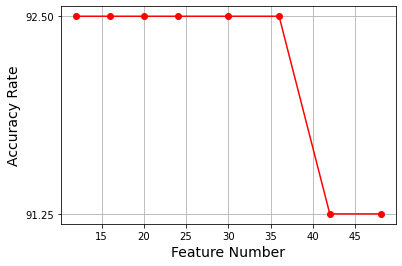

In [7]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
def make_feature_selection(X, y, k_num):
    fs = SelectKBest(score_func=chi2, k=k_num)
    return fs.fit_transform(X, y)

def ft_slc_eva():
    acc_list = []
    k = [12,16,20,24,30,36,42,48]
    for i in k:
        KBest_feature_selection = make_feature_selection(X, y, i)
        X_train, X_test, y_train, y_test = train_test_split(KBest_feature_selection, y, test_size=0.2,
                                                            random_state=0)
        rfc = LogisticRegression(solver='lbfgs', max_iter=4000, random_state=0)
        rfc.fit(X_train, y_train)
        rfc_predict = rfc.predict(X_test)
        acc = metrics.accuracy_score(y_test, rfc_predict)
        percentage = acc * 100
        formatted = "{:.2f}".format(percentage)
        acc_list.append(formatted)

    # Plot Feature Number - Accuracy Rate
    acc_list.sort(reverse=True)
    plt.plot(k, acc_list, color='red', marker='o')
    plt.xlabel('Feature Number', fontsize=14)
    plt.ylabel('Accuracy Rate', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()


ft_slc_eva()

In [8]:
# KBest feature importance
fs = SelectKBest(score_func=chi2, k=12)
fs.fit(X, y)

selected_features = fs.get_support(indices=True)
for i in selected_features:
    print("Feature ", i)
    
new_X = X.iloc[:, selected_features]

# add Gender to the selected_features
new_X['Gender'] = df['Gender'].values
new_y = df['Disease']

Feature  1
Feature  2
Feature  3
Feature  4
Feature  27
Feature  28
Feature  34
Feature  36
Feature  37
Feature  38
Feature  40
Feature  47


As a final part of the data preparation we apply feature selection. We used SelecktKBest algorithm for this application. We tried with couple number of features and as you can see from the graph 12 best features are optimal for our dataset increasing or decreasing the number of features will not improve out accuracy rate so we will use 12 features for our model. Lastly you see the features that we will use in the above.


## Model<a class="anchor" id="model"></a>

In [9]:
# use inbuilt method feature_importances of tree based classifiers
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=1, test_size=0.20)

clf = LogisticRegression(solver='lbfgs', max_iter=4000, random_state=0).fit(new_X, new_y)

We will use LogisticRegression for this project we tried different model and see that LogisticRegression is the best one so far and one of the fast ones.

In [10]:
# pickle_out = open("classifier.pkl", mode = "wb")
# pickle.dump(clf, pickle_out)
# pickle_out.close()

Then we are saving this model for our website interface. Since we already do that this part will shown in this report as comment

## Evaluation<a class="anchor" id="evaluation"></a>

In [11]:
predictions = clf.predict(X_test)
result = accuracy_score(predictions,y_test)
print("accuracy score = {}%".format(result*100))

accuracy score = 97.5%


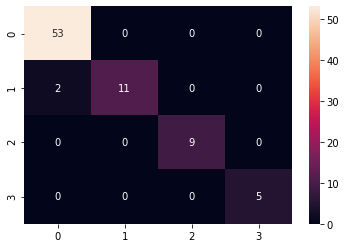

In [12]:
cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix,annot=True)
plt.show()

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        53
           2       1.00      0.85      0.92        13
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5

    accuracy                           0.97        80
   macro avg       0.99      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



As you can see from above, our model is really successful. 97% accuracy rate and f1-scores are quite good as well.

## Web Interface<a class="anchor" id="webinterface"></a>

In web interface side, we use Streamlit. We connect in localhost:8501 port(1) but it can be changed Streamlit gives that automatically. There are several input style. We use one to get gender information(2).

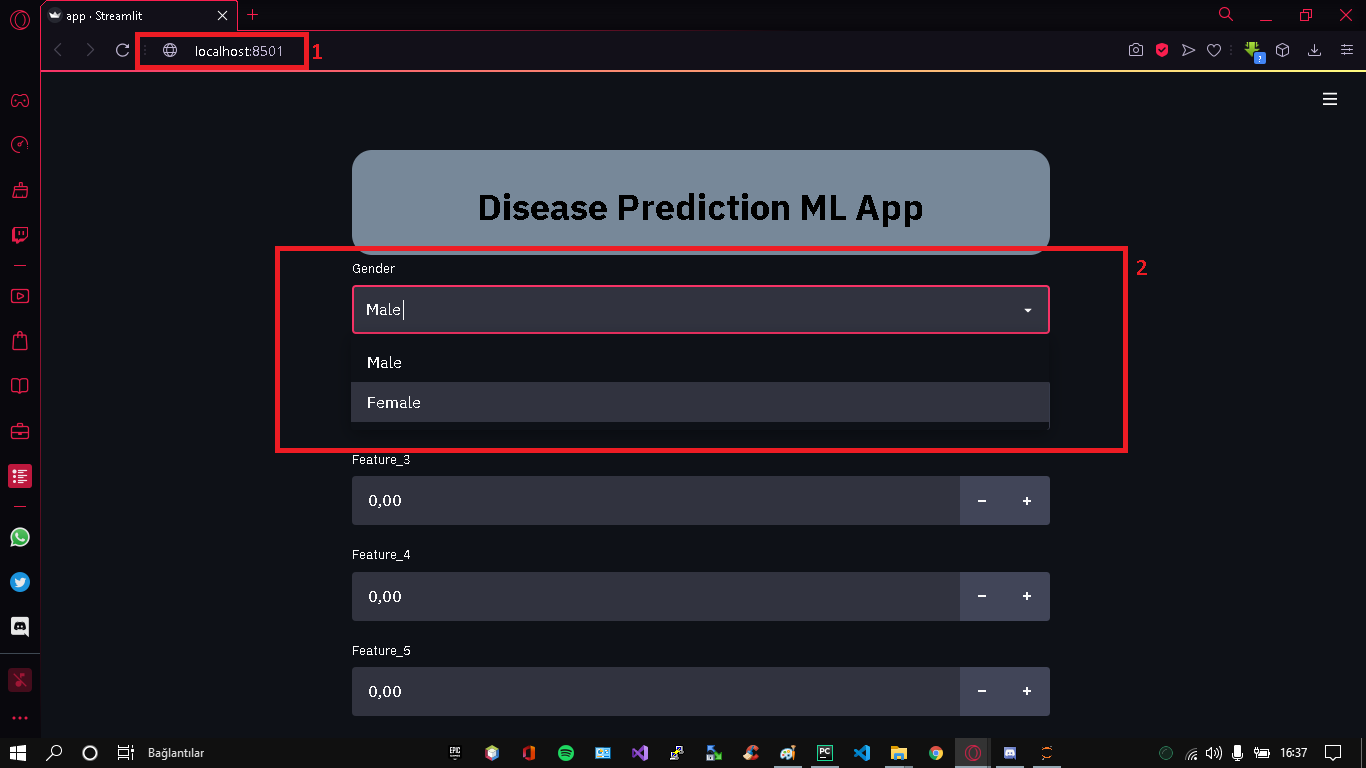

Some input parts are prepared to get numeric numbers from the user.

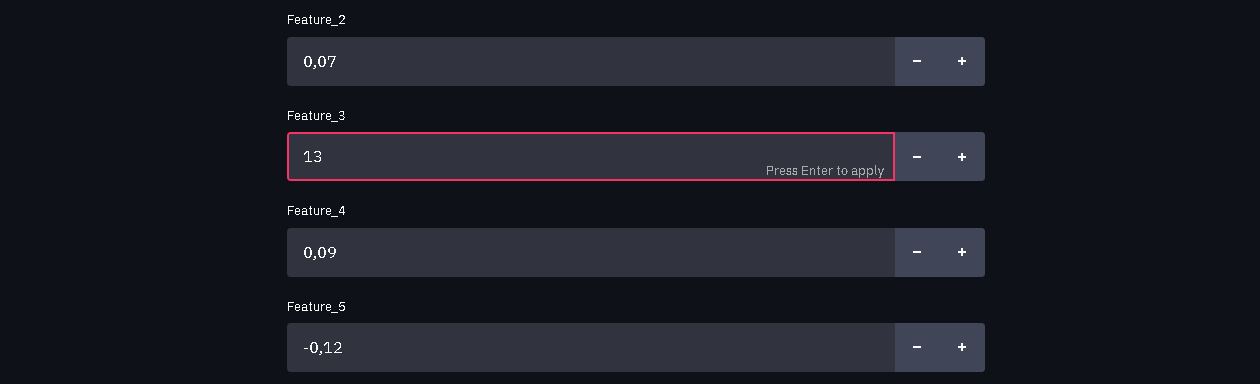

Some input parts prepared multiple choice responses from the user.

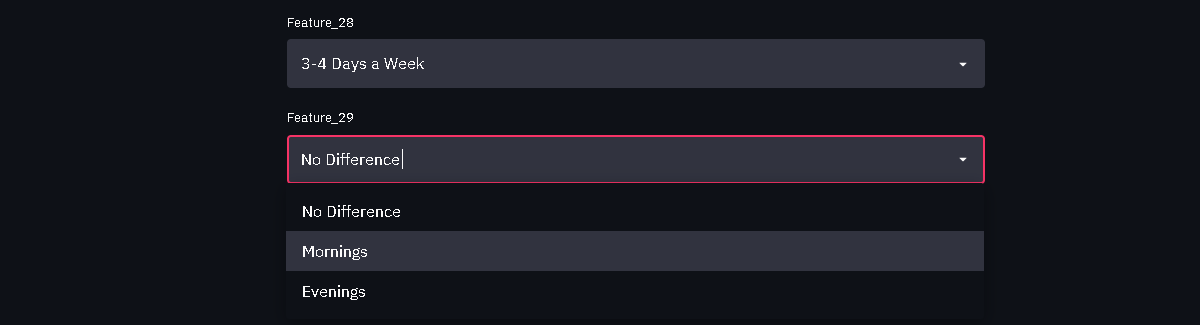

Some input parts are prepared to get a yes and no answer from the user.

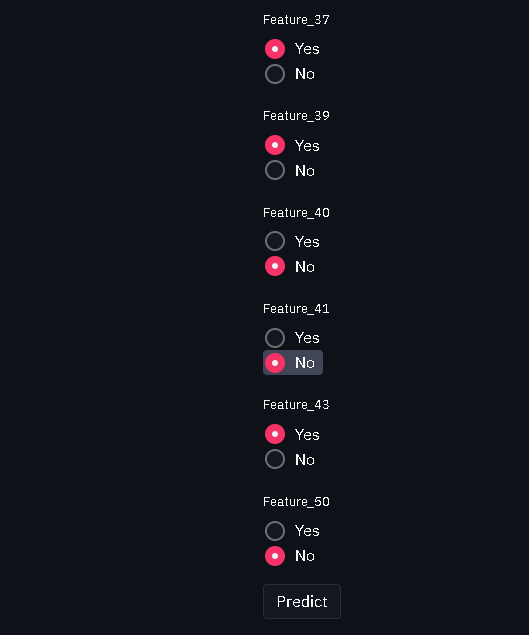

When you clicked the "Predict" button you will see top three Disease Probabilities.

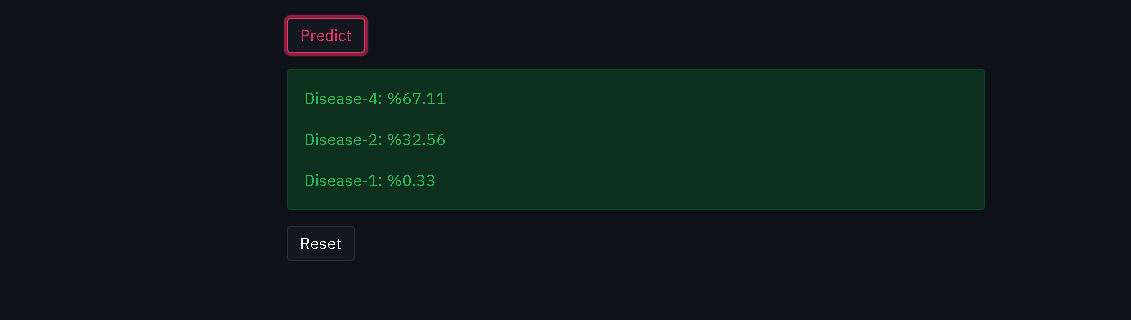

(1) Predict Button
(2) Reset Button : When you clicked, all your answers return to default.

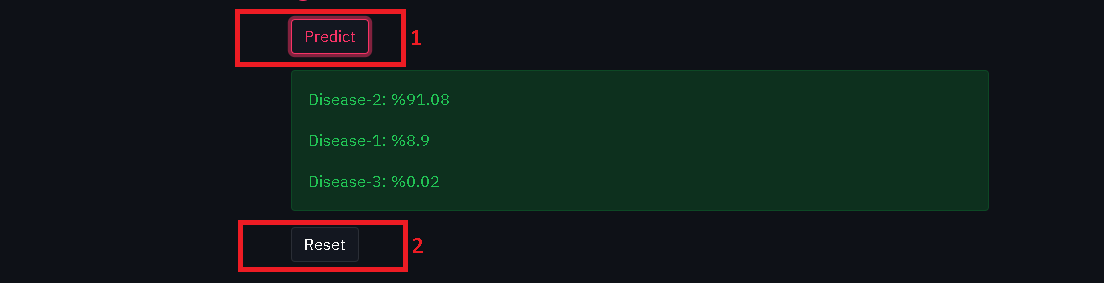

## References<a class="anchor" id="references"></a>

https://gist.github.com/tvst/036da038ab3e999a64497f42de966a92

https://docs.streamlit.io/en/stable/

https://docs.streamlit.io/en/stable/deploy_streamlit_app.html

https://docs.streamlit.io/en/stable/streamlit_configuration.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://discuss.streamlit.io/t/reset-radio-button-value-after-pushing-button/2618

https://medium.com/analytics-vidhya/heart-disease-prediction-with-machine-learning-d22bc924d8ab

https://discuss.streamlit.io/t/multi-page-app-with-session-state/3074

https://discuss.streamlit.io


**Disclaimer!** <font color='grey'>This notebook was prepared by Harun BURKUK and Muhammet SUBASI as an assigment for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>